In [2]:

import os
from pathlib import Path

from ansys.heart.misc.downloader import download_case, unpack_case
import ansys.heart.preprocessor.models as models

# sphinx_gallery_start_ignore
os.environ["USE_OLD_HEART_MODELS"] = "1"
# sphinx_gallery_end_ignore
__file__ = r"c:\Users\xuhu\pyheart-lib\examples\preprocessor\doc_ECG_coordinates,py"

# specify necessary paths.
# Note that we need to cast the paths to strings to facilitate serialization.
case_file = str(
    Path(Path(__file__).resolve().parents[2], "downloads", "Strocchi2020", "01", "01.case")
)
download_folder = str(Path(Path(__file__).resolve().parents[2], "downloads"))
workdir = str(
    Path(Path(__file__).resolve().parents[2], "downloads", "Strocchi2020", "01", "Biv")
)
path_to_model = str(Path(workdir, "heart_model.pickle"))


if not os.path.isfile(case_file):
    path_to_downloaded_file = download_case(
        "Strocchi2020", 1, download_folder=download_folder, overwrite=False
    )
    unpack_case(path_to_downloaded_file)

info = models.ModelInfo(
    database="Strocchi2020",
    path_to_case=case_file,
    work_directory=workdir,
    path_to_model=path_to_model,
    add_blood_pool=False,
    mesh_size=1.5,
)

In [3]:
# create the working directory
info.create_workdir()
# clean the working directory
info.clean_workdir(extensions_to_remove=[".stl", ".vtk", ".msh.h5"])
# dump information to stdout
info.dump_info()

In [4]:
# Initialize the heart model
# ~~~~~~~~~~~~~~~~~~~~~~~~~~
# Initialize the desired heart model, and invoke the main method to
# extract the simulation mesh and dump the model to disk. This will extract
# the relevant parts from the original model and remesh the entire surface and
# volume. Moreover, relevant anatomical features are extracted.

# instantiate a four chamber model
model = models.BiVentricle(info)

# extract the simulation mesh
model.extract_simulation_mesh()

# dump the model to disk for future use
model.dump_model(path_to_model)
# print the resulting information
model.print_info()

# print part names
print(model.part_names)

2023/10/09 17:12:00 - DEBUG - Establishing tetra-face connectivity...
2023/10/09 17:12:26 - DEBUG - Time elapsed: 26.8 s
2023/10/09 17:12:27 - DEBUG - Skipping interface pair: Left ventricle myocardium | Right ventricle myocardium
2023/10/09 17:12:28 - DEBUG - Extracting : ['epicardium', 'endocardium', 'septum'] from left-ventricle-myocardium
2023/10/09 17:12:28 - DEBUG - Extracting : ['epicardium', 'endocardium'] from right-ventricle-myocardium
2023/10/09 17:12:31 - INFO - Remeshing volume...
2023/10/09 17:12:34 - DEBUG - Starting meshing in directory: C:\Users\xuhu\pyheart-lib\downloads\Strocchi2020\01\Biv\meshing



Importing one geom object per program-controlled and one zone per body ...
    C:\\Program Files\\ANSYS Inc\\v222\\commonfiles\\CPython\\3_7\\winx64\\Release\\python\\..\\Ansys\\TGrid\\CADReaders.py started by xuhu on LYOTRAINEE14 winx64 on Mon Oct  9 17:13:03 2023
    using Python 3.7.13 (remotes/origin/bdighole/python/3713/clean_up-dirty:d4e1bece, Apr  6 2022, 00:24:) [MSC v.1920 64 bit (AMD64)]
    
    using Ansys.Meshing.FieldMesher build May 27 2022 08:47:51
    
    running ANSYS TGrid CADToTGridConverter ...
    setting up parameters ...
    setting up parameters done.
    running conversion ...
    converting 9 file(s) from Workbench to FLTG using output path 'C:\\Users\\xuhu\\AppData\\Local\\Temp/out169686438289244.tgf'
    converting file 'part_left-ventricle-endocardium.stl' (1 of 9) from Workbench to FLTG using output path 'C:\\Users\\xuhu\\AppData\\Local\\Temp'
    importing data ...
    importing meshing model in STL format from file 'C:\\Users\\xuhu\\pyheart-lib\\downl

2023/10/09 17:13:55 - DEBUG - Excluding 4 array names
2023/10/09 17:13:55 - DEBUG - Removing cell data...uvc_intraventricular
2023/10/09 17:13:55 - DEBUG - Removing cell data...uvc_longitudinal
2023/10/09 17:13:55 - DEBUG - Removing cell data...uvc_rotational
2023/10/09 17:13:55 - DEBUG - Removing cell data...uvc_transmural
2023/10/09 17:13:55 - WARNING - Normalization of vectors is buggy and turned off
2023/10/09 17:13:55 - WARNING - Removed returning cell / point data
2023/10/09 17:13:59 - DEBUG - Excluding 5 array names
2023/10/09 17:14:00 - DEBUG - Removing cell data...electrode_endo_rv
2023/10/09 17:14:00 - DEBUG - Removing cell data...uvc_intraventricular
2023/10/09 17:14:00 - DEBUG - Removing cell data...uvc_longitudinal
2023/10/09 17:14:00 - DEBUG - Removing cell data...uvc_rotational
2023/10/09 17:14:00 - DEBUG - Removing cell data...uvc_transmural
2023/10/09 17:14:00 - DEBUG - Removing point data...fiber
2023/10/09 17:14:00 - DEBUG - Removing point data...sheet
2023/10/09 17:

['Left ventricle', 'Right ventricle', 'Septum']


In [5]:
print(model.part_names)

['Left ventricle', 'Right ventricle', 'Septum']


In [6]:
model.mesh.tetrahedrons[model.left_ventricle.element_ids,:]


array([[102683,  78487,  78489,  89274],
       [ 64176,  51968,  17370,  97687],
       [ 91056,  91053,  83830,  71191],
       ...,
       [113150,  16469, 113085,  16519],
       [113150,  75353,  62522,  40805],
       [113150,  69263,  75353,  40805]], dtype=int64)

c:\ProgramData\miniforge3\envs\env38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


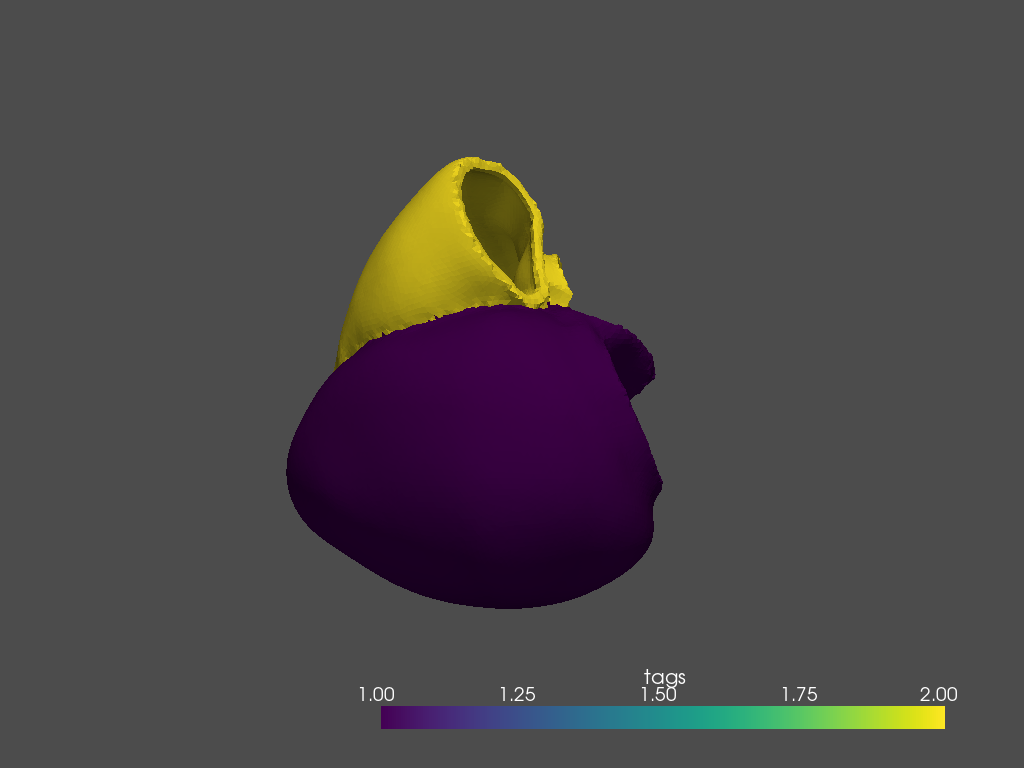

In [7]:
# plot the remeshed model
model.plot_mesh(show_edges=False)
# model.plot_mesh()

In [ ]:
for cap in model.left_ventricle.caps:
            # if cap.name == "mitral-valve":
            #     mv_center = cap.centroid
    print(cap.name, cap.centroid)

for cap in model.right_ventricle.caps:
            # if cap.name == "mitral-valve":
            #     mv_center = cap.centroid
    print(cap.name, cap.centroid)

aortic-valve [  4.20857519 118.32163226 391.43196981]
mitral-valve [ 15.04158011 139.09469458 381.88963037]
pulmonary-valve [ 11.89445634  95.82599368 423.84591809]
tricuspid-valve [-22.98204015  92.93555511 363.03724758]


In [4]:
for apex in model.left_ventricle.apex_points:
    # if "endocardium" in apex.name:
    #     apex_ed = apex.xyz
    # elif "epicardium" in apex.name:
    #     apex_ep = apex.xyz
    print("left_ventricle apex: ", apex.xyz)


for apex in model.right_ventricle.apex_points:
    # if "endocardium" in apex.name:
    #     apex_ed = apex.xyz
    # elif "epicardium" in apex.name:
    #     apex_ep = apex.xyz
    print("right_ventricle apex: ", apex.xyz)

left_ventricle apex:  [ 66.98953175  76.04045288 353.25812367]
left_ventricle apex:  [ 70.91348565  72.35403913 352.7457911 ]
right_ventricle apex:  [ 45.9829824   77.48032215 333.94426975]
right_ventricle apex:  [ 47.77539122  77.14911944 331.0164472 ]


In [ ]:
fix_points = []

# Iterate over caps in the left ventricle
for cap in model.left_ventricle.caps:
    fix_points.append(cap.centroid)

# Iterate over caps in the right ventricle
for cap in model.right_ventricle.caps:
    fix_points.append(cap.centroid)

# Iterate over apex points in the left ventricle
for apex in model.left_ventricle.apex_points:
    fix_points.append(apex.xyz)

# Iterate over apex points in the right ventricle
for apex in model.right_ventricle.apex_points:
    fix_points.append(apex.xyz)

# Convert the list of points to a NumPy array
fix_points = np.array(fix_points)

# Print or use the array as needed
print("Fix Points Array:")
print(fix_points)


Fix Points Array:
[[  4.20857519 118.32163226 391.43196981]
 [ 15.04158011 139.09469458 381.88963037]
 [ 11.89445634  95.82599368 423.84591809]
 [-22.98204015  92.93555511 363.03724758]
 [ 67.26314232  76.51744761 352.68705118]
 [ 70.05125821  71.62641545 352.42993226]
 [ 45.41901794  78.01370688 333.33936308]
 [ 47.67597045  76.44610331 331.14411229]]


c:\Users\xuhu\pyheart-lib\myenv38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


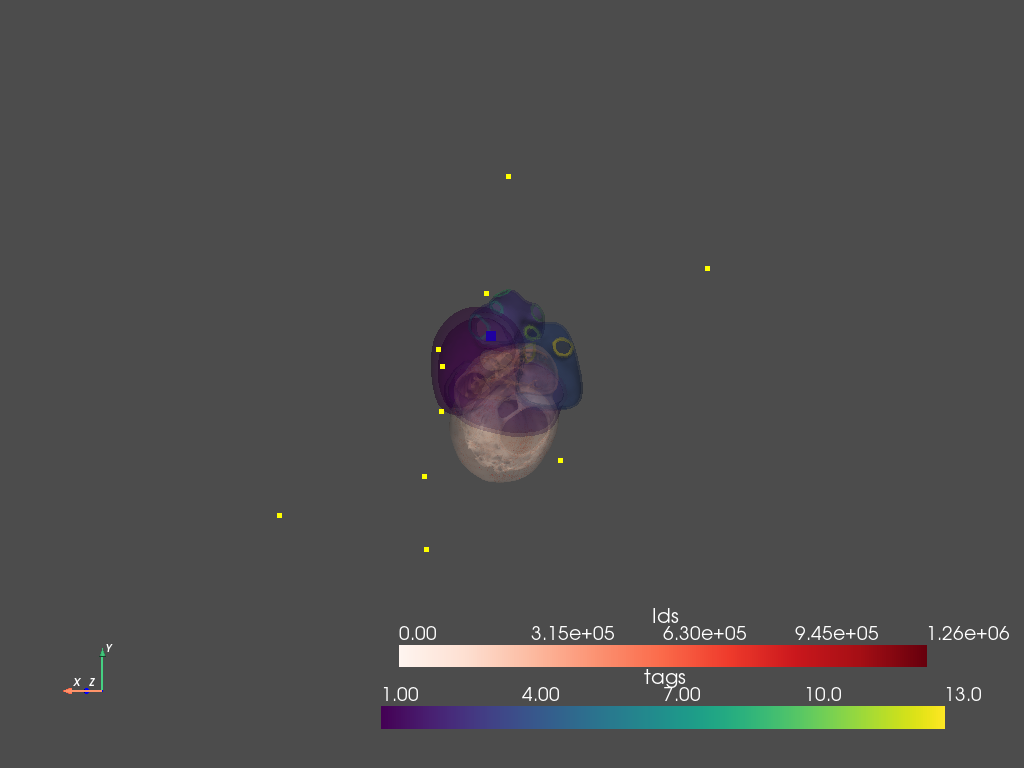

'\n        for cap in self.left_ventricle.caps:\n            if cap.name == "mitral-valve":\n                mv_center = cap.centroid\n        for apex in self.left_ventricle.apex_points:\n            if "endocardium" in apex.name:\n                apex_ed = apex.xyz\n            elif "epicardium" in apex.name:\n                apex_ep = apex.xyz\n'

In [5]:
# mitral_valve = model.left_ventricle.caps[0].centroid

import pyvista
import numpy as np



# -------------pyheart-lib model------------

plotter = pyvista.Plotter()
# plotter.add_mesh(model.mesh_raw, scalars="tags")
plotter.add_mesh(model.mesh, scalars="tags", opacity=0.3)


# # apex
# apex_positions = np.array([
#     [x, y, z] for x, y, z in [
#         [66.62810203, 76.12861982, 352.41549411],  # left_ventricle 
#         [70.47995636, 71.98645826, 352.59139088],  # left_ventricle 
#         [45.85018296, 77.32545243, 333.88303795],  # right_ventricle 
#         [47.31442245, 76.77050607, 330.717218]  # right_ventricle
#     ]
# ])
# apex = pyvista.PolyData(apex_positions)
# plotter.add_mesh(apex, color="red", point_size=10)



"""
mitral-valve [ 14.83343254 138.84328635 381.69040887]
aortic-valve [  4.05351488 118.41811815 391.29761896]
tricuspid-valve [-23.05345085  92.81499077 363.12556701]
pulmonary-valve [ 12.11718736  95.61561885 424.1137484 ]
"""
caps_positions = np.array([
    [x, y, z] for x, y, z in [
        [14.83343254, 138.84328635, 381.69040887]
        # [4.05351488, 118.41811815, 391.29761896], 
        # [-23.05345085,  92.81499077, 363.12556701], 
        # [12.11718736,  95.61561885, 424.1137484] 
    ]
])
caps = pyvista.PolyData(caps_positions)
plotter.add_mesh(caps, color="blue", point_size=10)
# plotter.add_mesh([-23.05345085,  92.81499077, 363.12556701], color="red", point_size=10)
# plotter.add_mesh([12.11718736,  95.61561885, 424.1137484], color="yellow", point_size=10)

# Adding labels for each point
point_names = ["mitral-valve", "aortic-valve", "tricuspid-valve", "pulmonary-valve"]





# -------------torso model------------

file_path = "C:/Users/xuhu/pyvista_test/2019_Lopez_torsoPAP_tetraVol-Labeled/torsoPAP_tetraVol-Labeled_ORIGINAL_full.vtk"
torso = pyvista.read(file_path)

Organids_array = torso["OrganID"]
organ_id_to_plot = 7
# ribs = torso.threshold([organ_id_to_plot - 0.1, organ_id_to_plot + 0.1], scalars="OrganID")
heart = torso.threshold([organ_id_to_plot - 0.1, organ_id_to_plot + 0.1], scalars="OrganID")

electrode_positions = np.array([
    [x, y, z] for x, y, z in [
        [91.69106809237354, 167.4055272828183, 251.0416838617331],  # V1
        [114.07772933063883, 123.13918227704727, 291.5674747053013],  # V2
        [97.01364431022192, 109.7927312489943, 317.44575378942824],  # V3
        [81.88880486815538, 71.3859176743268, 349.4243690358569],  # V4
        [98.99550734014053, 15.879947224122954, 348.26233938958114],  # V5
        [106.23537044908527, -44.085603837273695, 329.16199248487465],  # V6
        [170.75567690191764, 234.51300755277248, 77.85629801985534],  # RA
        [262.9539413249434, -2.9189733795951724, 261.5745131716608],  # LA
        [-134.9640236606803, 197.05542132895272, 257.6409644703581],  # RL
        [-70.4506948627224, 22.20437217827933, 400.2792599184596]  # LL
    ]
])

electrodes = pyvista.PolyData(electrode_positions)

result = heart

plotter.add_mesh(result, cmap="Reds", opacity=0.3)
plotter.add_mesh(electrodes, color="yellow", point_size=5)


plotter.camera_position = 'xy'
plotter.camera.azimuth = 150.0




plotter.show_axes()
plotter.show()
"""
        for cap in self.left_ventricle.caps:
            if cap.name == "mitral-valve":
                mv_center = cap.centroid
        for apex in self.left_ventricle.apex_points:
            if "endocardium" in apex.name:
                apex_ed = apex.xyz
            elif "epicardium" in apex.name:
                apex_ep = apex.xyz
"""

c:\ProgramData\miniforge3\envs\env38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


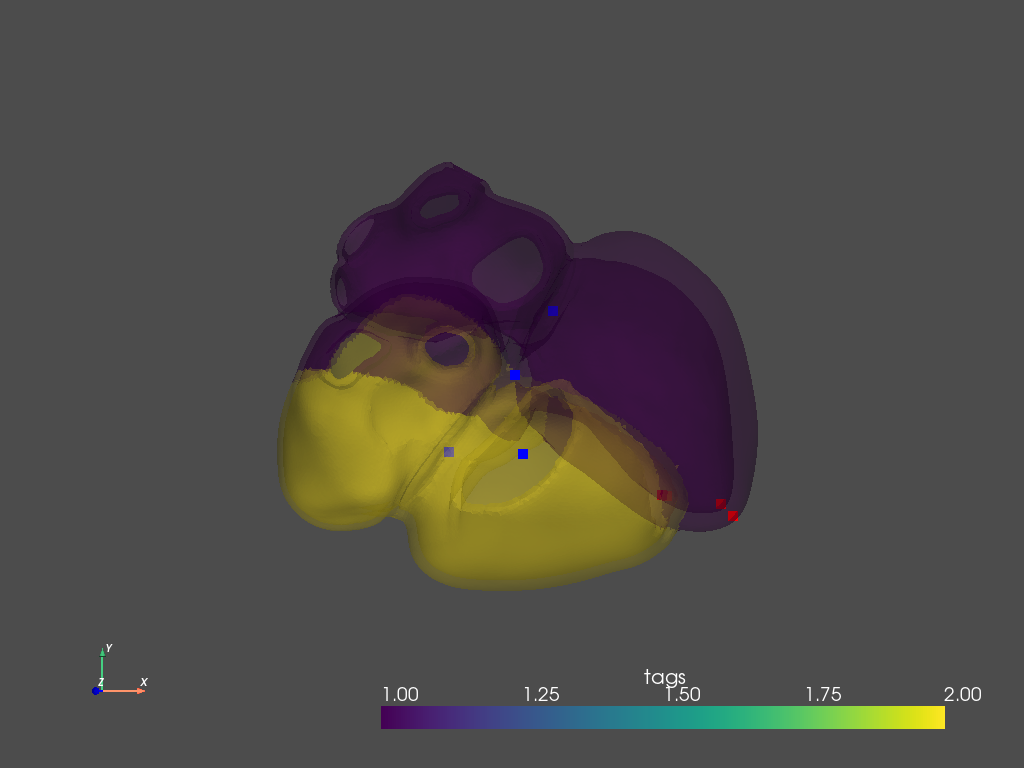

In [11]:
import pyvista
import numpy as np

plotter = pyvista.Plotter()
# plotter.add_mesh(model.mesh_raw, scalars="tags")
plotter.add_mesh(model.mesh, scalars="tags", opacity=0.3)


# apex
apex_positions = np.array([
    [x, y, z] for x, y, z in [
        [66.62810203, 76.12861982, 352.41549411],  # left_ventricle 
        [70.47995636, 71.98645826, 352.59139088],  # left_ventricle 
        [45.85018296, 77.32545243, 333.88303795],  # right_ventricle 
        [47.31442245, 76.77050607, 330.717218]  # right_ventricle
    ]
])
apex = pyvista.PolyData(apex_positions)
plotter.add_mesh(apex, color="red", point_size=10)


"""
mitral-valve [ 14.83343254 138.84328635 381.69040887]
aortic-valve [  4.05351488 118.41811815 391.29761896]
tricuspid-valve [-23.05345085  92.81499077 363.12556701]
pulmonary-valve [ 12.11718736  95.61561885 424.1137484 ]
"""
caps_positions = np.array([
    [x, y, z] for x, y, z in [
        [14.83343254, 138.84328635, 381.69040887],
        [4.05351488, 118.41811815, 391.29761896], 
        [-23.05345085,  92.81499077, 363.12556701], 
        [12.11718736,  95.61561885, 424.1137484] 
    ]
])
caps = pyvista.PolyData(caps_positions)
plotter.add_mesh(caps, color="blue", point_size=10)
# plotter.add_mesh([-23.05345085,  92.81499077, 363.12556701], color="red", point_size=10)
# plotter.add_mesh([12.11718736,  95.61561885, 424.1137484], color="yellow", point_size=10)

# Adding labels for each point
point_names = ["mitral-valve", "aortic-valve", "tricuspid-valve", "pulmonary-valve"]

plotter.camera_position = 'xy'
plotter.camera.azimuth = 10.0

plotter.show_axes()
plotter.show()


c:\Users\xuhu\pyheart-lib\myenv38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


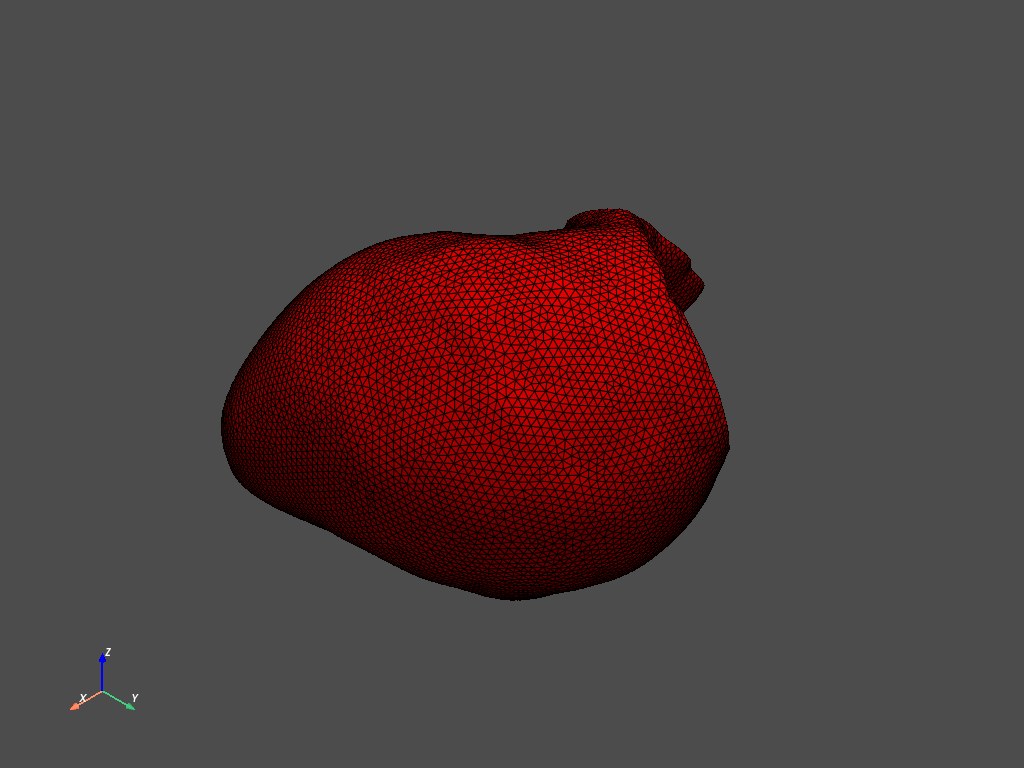

In [7]:
model.left_ventricle.endocardium.plot(show_edges=True, color="r")

In [8]:
file_path = "C:/Users/xuhu/pyvista_test/2019_Lopez_torsoPAP_tetraVol-Labeled/torsoPAP_tetraVol-Labeled_ORIGINAL_full.vtk"
torso = pyvista.read(file_path)

Organids_array = torso["OrganID"]
organ_id_to_plot = 7
# ribs = torso.threshold([organ_id_to_plot - 0.1, organ_id_to_plot + 0.1], scalars="OrganID")
heart = torso.threshold([organ_id_to_plot - 0.1, organ_id_to_plot + 0.1], scalars="OrganID")

electrode_positions = np.array([
    [x, y, z] for x, y, z in [
        [91.69106809237354, 167.4055272828183, 251.0416838617331],  # V1
        [114.07772933063883, 123.13918227704727, 291.5674747053013],  # V2
        [97.01364431022192, 109.7927312489943, 317.44575378942824],  # V3
        [81.88880486815538, 71.3859176743268, 349.4243690358569],  # V4
        [98.99550734014053, 15.879947224122954, 348.26233938958114],  # V5
        [106.23537044908527, -44.085603837273695, 329.16199248487465],  # V6
        [170.75567690191764, 234.51300755277248, 77.85629801985534],  # RA
        [262.9539413249434, -2.9189733795951724, 261.5745131716608],  # LA
        [-134.9640236606803, 197.05542132895272, 257.6409644703581],  # RL
        [-70.4506948627224, 22.20437217827933, 400.2792599184596]  # LL
    ]
])


In [9]:
Organids_array = torso["OrganID"]
organ_id_to_plot = 7
# ribs = torso.threshold([organ_id_to_plot - 0.1, organ_id_to_plot + 0.1], scalars="OrganID")
heart = torso.threshold([organ_id_to_plot - 0.1, organ_id_to_plot + 0.1], scalars="OrganID")


# mitral_valve_positions

centroid of aortic_valve_positions: [ 81.90321388  57.90000882 205.76663367]


c:\Users\xuhu\pyheart-lib\myenv38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


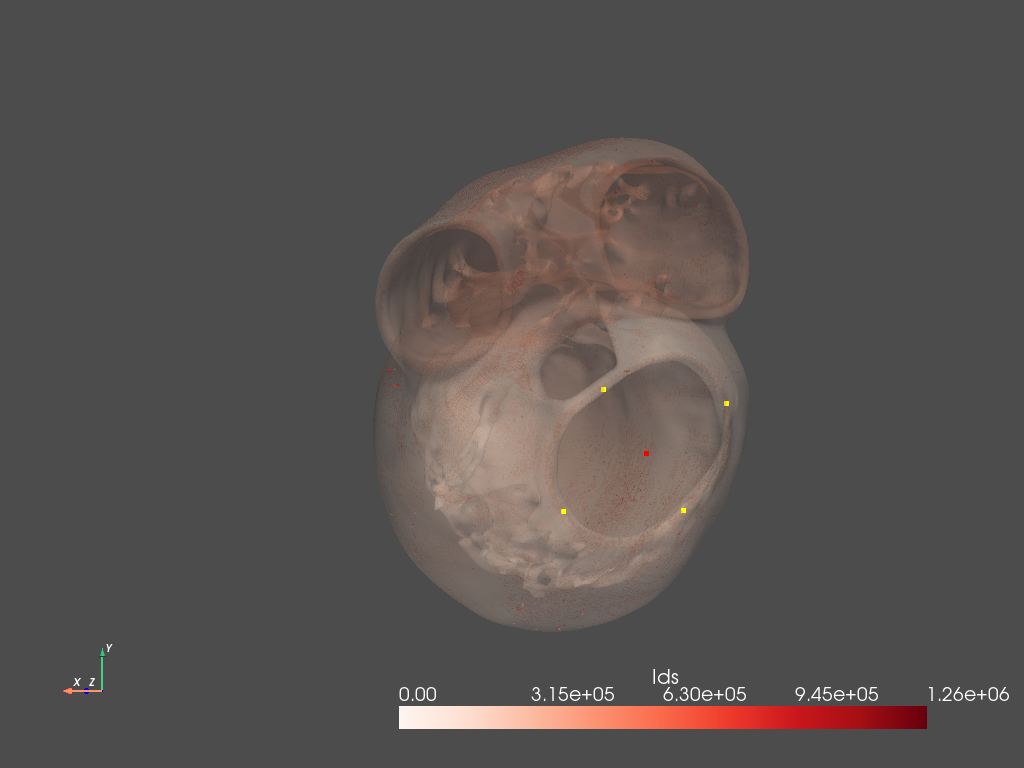

In [10]:
plotter = pyvista.Plotter()


mitral_valve_positions = np.array([
    [x, y, z] for x, y, z in [
        [102.13778053234724, 46.70963334237971, 206.0882764301173], 
        [60.21841689576804, 68.07773334775118, 206.29345302964003], 
        [72.33039195315048, 45.53031730111749, 205.46089922101675], 
        [92.92626615056916, 71.28235128878418, 205.2239059795662] 
    ]
])

center = np.mean(mitral_valve_positions, axis=0)

print("centroid of aortic_valve_positions:", center)


# result = mitral_valve_positions + center
# result = pyvista.PolyData(result)

plotter.add_mesh(heart, cmap="Reds", opacity=0.3)
plotter.add_mesh(mitral_valve_positions, color="yellow", point_size=5)
plotter.add_mesh(center, color="red", point_size=5)


plotter.camera_position = 'xy'
plotter.camera.azimuth = 150.0

plotter.show_axes()
plotter.show()



# aortic-valve
mitral-valve [ 14.83343254 138.84328635 381.69040887]
aortic-valve [  4.05351488 118.41811815 391.29761896]
tricuspid-valve [-23.05345085  92.81499077 363.12556701]
pulmonary-valve [ 12.11718736  95.61561885 424.1137484 ]

c:\Users\xuhu\pyheart-lib\myenv38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


centroid of aortic_valve_positions: [ 94.35242091  75.99022315 213.31654731]


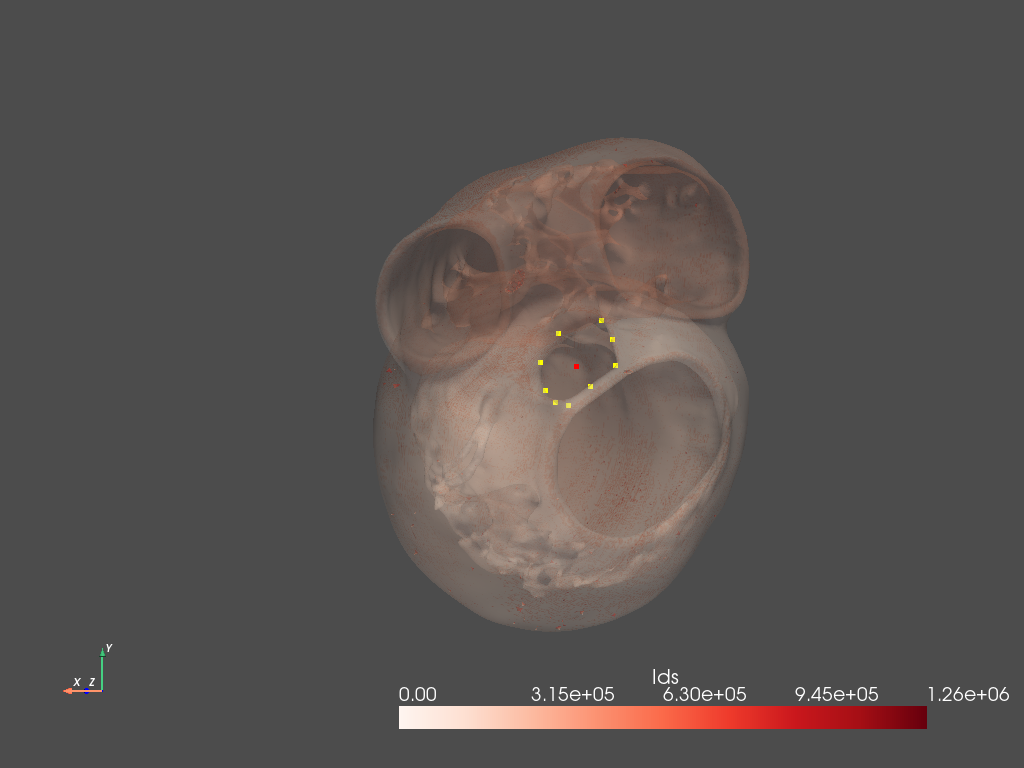

In [11]:
plotter = pyvista.Plotter()

aortic_valve_positions = np.array([
    [x, y, z] for x, y, z in [
        [99.77592023746598, 76.91491381452849, 218.98250022332695], 
        [87.71579975023887, 76.32206483418284, 208.4652361205975], 
        [85.61704246483175, 86.0948156965561, 217.09325321141287], 
        [93.80619537425241, 83.25128464554103, 221.44249773171808],
        [99.4449440951288, 68.06007015491959, 208.36346937227108], 
        [94.60117570630268, 71.94772025693614, 207.58335839716963], 
        [86.00633482557826, 81.74731394376036, 212.36152059286593], 
        [101.09766063452662, 71.00275421970389, 214.81258312784618], 
        [101.10671509020649, 68.57107078218371, 210.74450703993713]
    ]
])

center = np.mean(aortic_valve_positions, axis=0)

print("centroid of aortic_valve_positions:", center)


# result = mitral_valve_positions + center
# result = pyvista.PolyData(result)

plotter.add_mesh(heart, cmap="Reds", opacity=0.3)
plotter.add_mesh(aortic_valve_positions, color="yellow", point_size=5)
plotter.add_mesh(center, color="red", point_size=5)


plotter.camera_position = 'xy'
plotter.camera.azimuth = 150.0

plotter.show_axes()
plotter.show()


# tricuspid-valve

centroid of tricuspid_valve_positions: [ 67.14045655 102.49380179 216.20654707]


c:\Users\xuhu\pyheart-lib\myenv38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


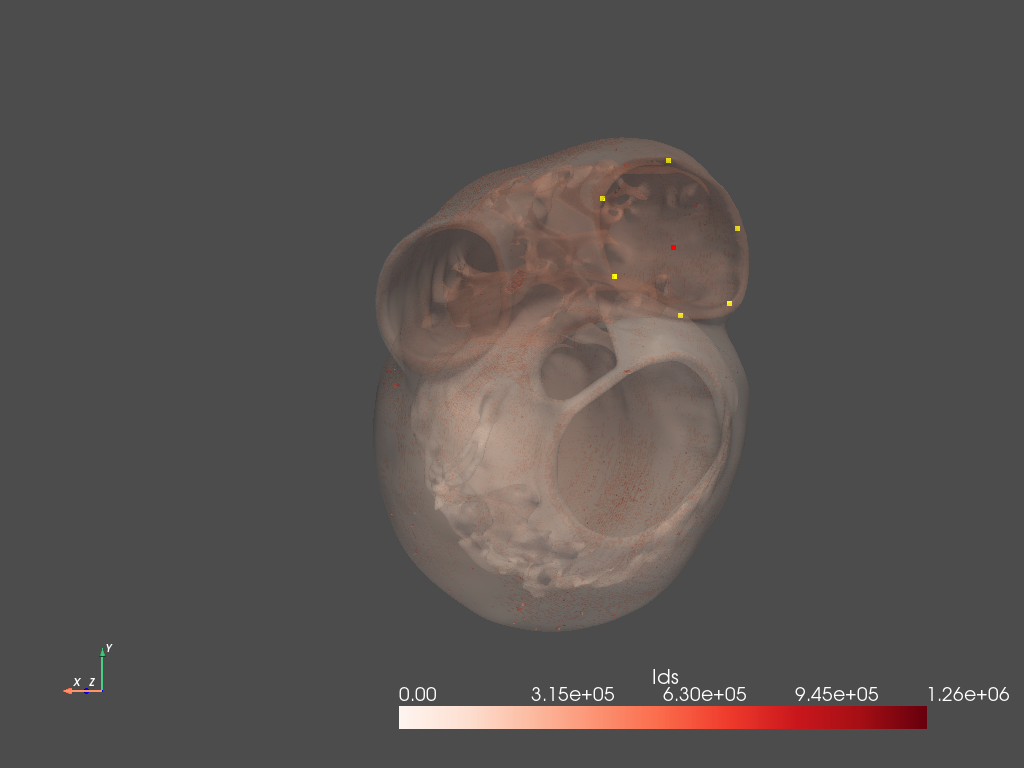

In [12]:
plotter = pyvista.Plotter()

tricuspid_valve_positions = np.array([
    [x, y, z] for x, y, z in [
        [86.0845569610601, 111.97907128826176, 215.99647771702078], 
        [83.96475960953897, 95.25709129591984, 214.3794363210167], 
        [51.59774414641035, 90.49840400970803, 216.1002158271926], 
        [65.90587660928651, 87.58654603349179, 215.23046753395383], 
        [67.48509919483496, 121.78735822401254, 217.71655916769225], 
        [47.804702780071054, 107.85433986376044, 217.8161258606844]
    ]
])

center = np.mean(tricuspid_valve_positions, axis=0)

print("centroid of tricuspid_valve_positions:", center)


# result = mitral_valve_positions + center
# result = pyvista.PolyData(result)

plotter.add_mesh(heart, cmap="Reds", opacity=0.3)
plotter.add_mesh(tricuspid_valve_positions, color="yellow", point_size=5)
plotter.add_mesh(center, color="red", point_size=5)


plotter.camera_position = 'xy'
plotter.camera.azimuth = 150.0

plotter.show_axes()
plotter.show()


# pulmonary-valve

centroid of tricuspid_valve_positions: [121.58912558  89.76497459 223.29557159]


c:\Users\xuhu\pyheart-lib\myenv38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


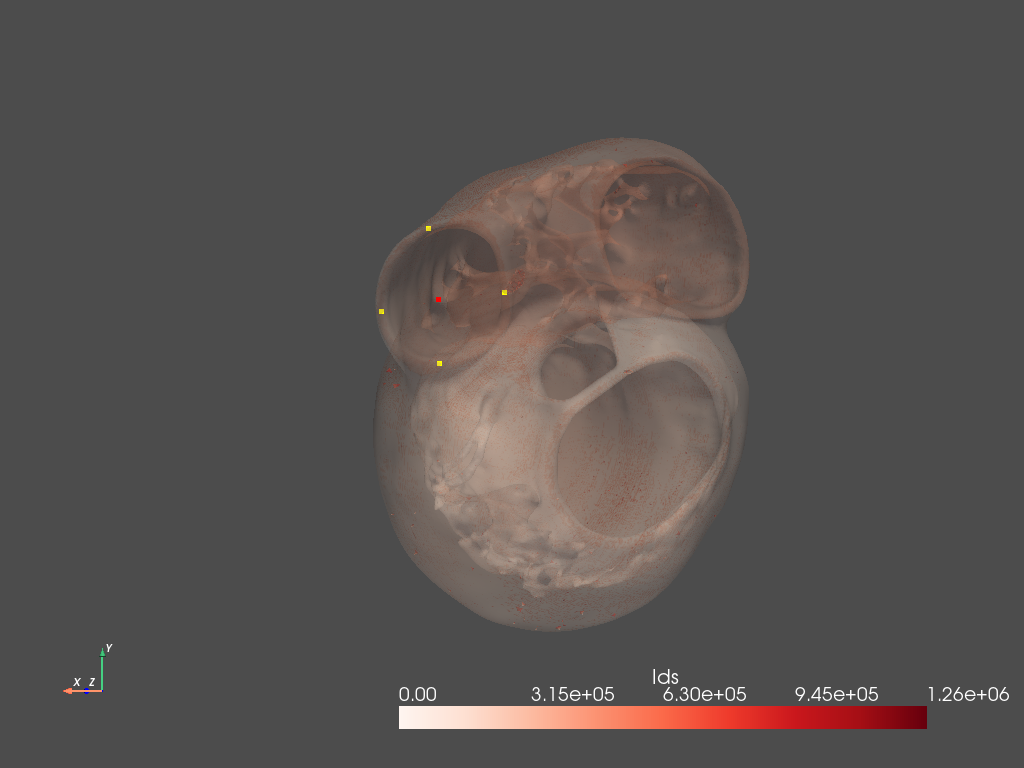

In [13]:
plotter = pyvista.Plotter()

pulmonary_valve_positions = np.array([
    [x, y, z] for x, y, z in [
        [132.1221128828606, 87.16975071674433, 228.57470036427966], 
        [109.47283105010436, 91.36191539481679, 217.23648596351697], 
        [125.5822074075434, 103.83999218310905, 219.9605016129176], 
        [119.17935096065494, 76.68824007453063, 227.410598400968]
    ]
])

center = np.mean(pulmonary_valve_positions, axis=0)

print("centroid of tricuspid_valve_positions:", center)


# result = mitral_valve_positions + center
# result = pyvista.PolyData(result)

plotter.add_mesh(heart, cmap="Reds", opacity=0.3)
plotter.add_mesh(pulmonary_valve_positions, color="yellow", point_size=5)
plotter.add_mesh(center, color="red", point_size=5)


plotter.camera_position = 'xy'
plotter.camera.azimuth = 150.0

plotter.show_axes()
plotter.show()


pip install SimpleITK
pip install itk
pip install itk-elastix

centroid of apex_endo_positions:


c:\Users\xuhu\pyheart-lib\myenv38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


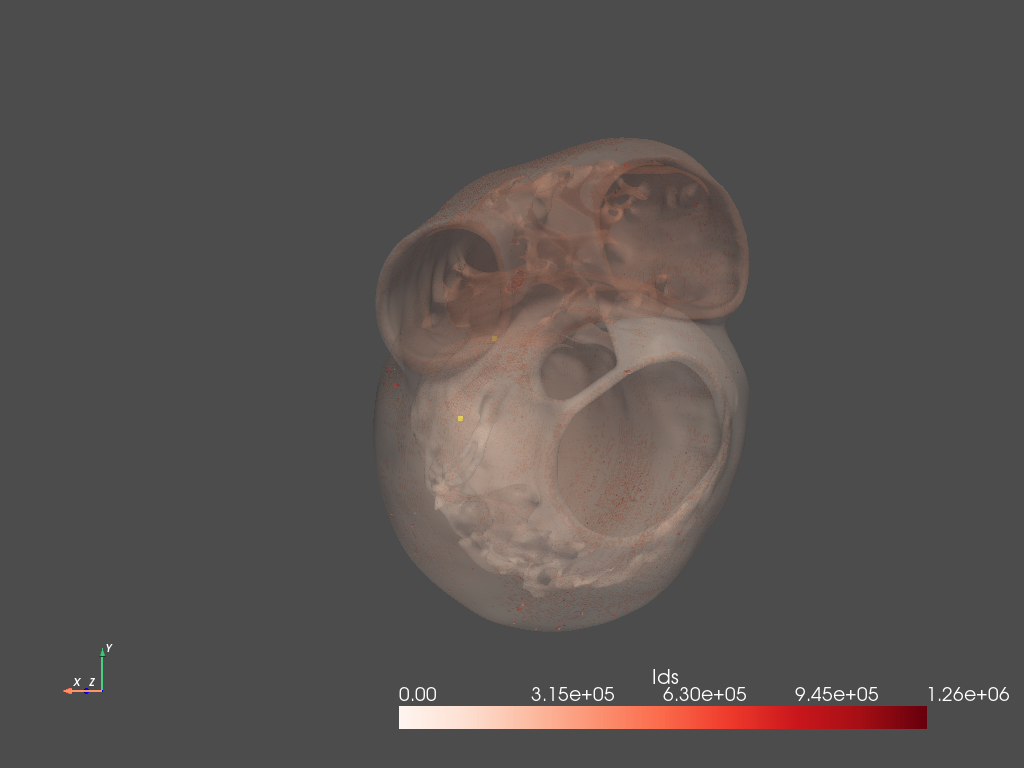

In [16]:
plotter = pyvista.Plotter()

apex_endo_positions = np.array([
    [x, y, z] for x, y, z in [
        [67.23725112873248, 84.63169515538843, 296.5102709741695], 
        [74.54353173118157, 63.020954005473115, 302.25073384261583]
    ]
])

center = np.mean(apex_endo_positions, axis=0)

print("centroid of apex_endo_positions:")


# result = mitral_valve_positions + center
# result = pyvista.PolyData(result)

plotter.add_mesh(heart, cmap="Reds", opacity=0.3)
plotter.add_mesh(apex_endo_positions, color="yellow", point_size=5)


plotter.camera_position = 'xy'
plotter.camera.azimuth = 150.0

plotter.show_axes()
plotter.show()

In [2]:
plotter = pyvista.Plotter()

apex_endo_positions = np.array([
    [x, y, z] for x, y, z in [
        [67.23725112873248, 84.63169515538843, 296.5102709741695], 
        [74.54353173118157, 63.020954005473115, 302.25073384261583]
    ]
])

center = np.mean(apex_endo_positions, axis=0)

print("centroid of apex_endo_positions:")


# result = mitral_valve_positions + center
# result = pyvista.PolyData(result)

plotter.add_mesh(heart, cmap="Reds", opacity=0.3)
plotter.add_mesh(apex_endo_positions, color="yellow", point_size=5)


plotter.camera_position = 'xy'
plotter.camera.azimuth = 10.0

plotter.show_axes()
plotter.show()

NameError: name 'pyvista' is not defined

## show all auxiliary points

c:\Users\xuhu\pyheart-lib\myenv38\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


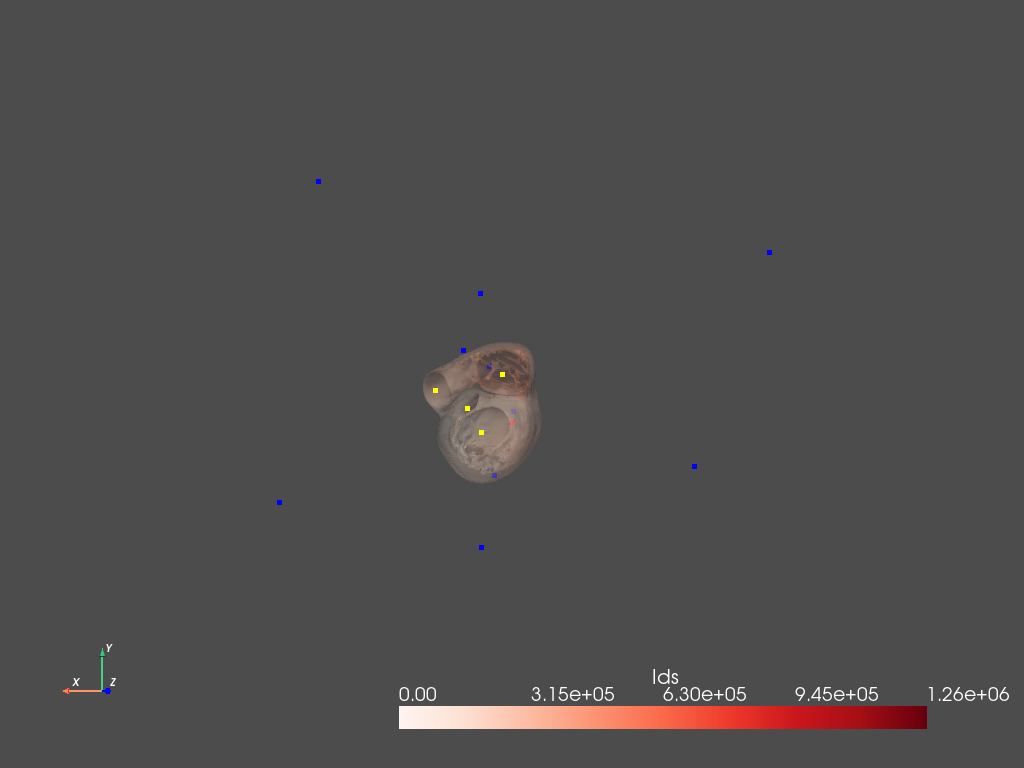

In [17]:
plotter = pyvista.Plotter()

valve_centroid_positions = np.array([
    [x, y, z] for x, y, z in [
        [81.90321388, 57.90000882, 205.76663367], 
        [94.35242091, 75.99022315, 213.31654731], 
        [67.14045655, 102.49380179, 216.20654707],
        [121.58912558, 89.76497459, 223.29557159]
    ]
])

apex_endo_positions = np.array([
    [x, y, z] for x, y, z in [
        [67.23725112873248, 84.63169515538843, 296.5102709741695], 
        [74.54353173118157, 63.020954005473115, 302.25073384261583]
    ]
])

plotter.add_mesh(heart, cmap="Reds", opacity=0.3)
plotter.add_mesh(valve_centroid_positions, color="yellow", point_size=5)
plotter.add_mesh(apex_endo_positions, color="red", point_size=5)
plotter.add_mesh(electrode_positions, color="blue", point_size=5)

plotter.camera_position = 'xy'
plotter.camera.azimuth = 190.0

plotter.show_axes()
plotter.show()

# Registration part

In [9]:
import itk
import pyvista as pv
import numpy as np

fixed_model = model.mesh
moving_model = torso

NameError: name 'model' is not defined

## 1: Visualization of the Moving Heart Model (Before Registration)
The PyVista plotter displays the initial state of the "moving" heart model, along with valve centroids, apex positions, and electrode positions.

Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.


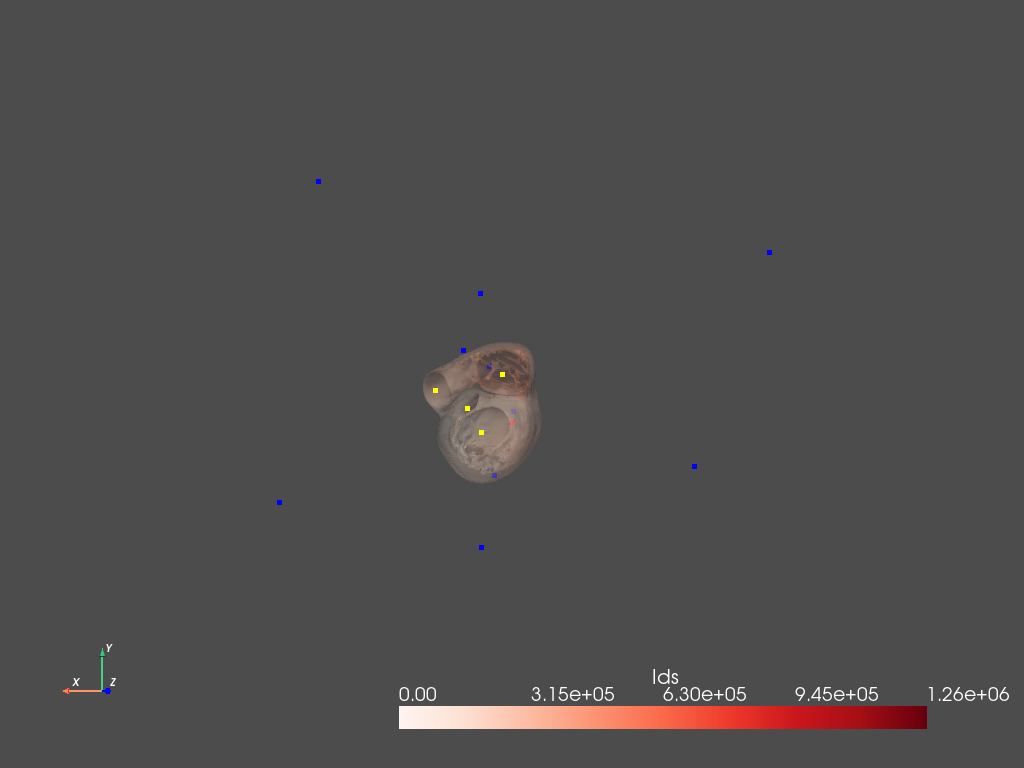

In [19]:
# Create PyVista plotter
plotter = pyvista.Plotter()

# Add meshes to the plotter
plotter.add_mesh(heart, cmap="Reds", opacity=0.3)
plotter.add_mesh(valve_centroid_positions, color="yellow", point_size=5)
plotter.add_mesh(apex_endo_positions, color="red", point_size=5)
plotter.add_mesh(electrode_positions, color="blue", point_size=5)

# Set camera position
plotter.camera_position = 'xy'
plotter.camera.azimuth = 190.0

# Show the plotter
plotter.show_axes()
plotter.show()


## 2: Registration

Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.


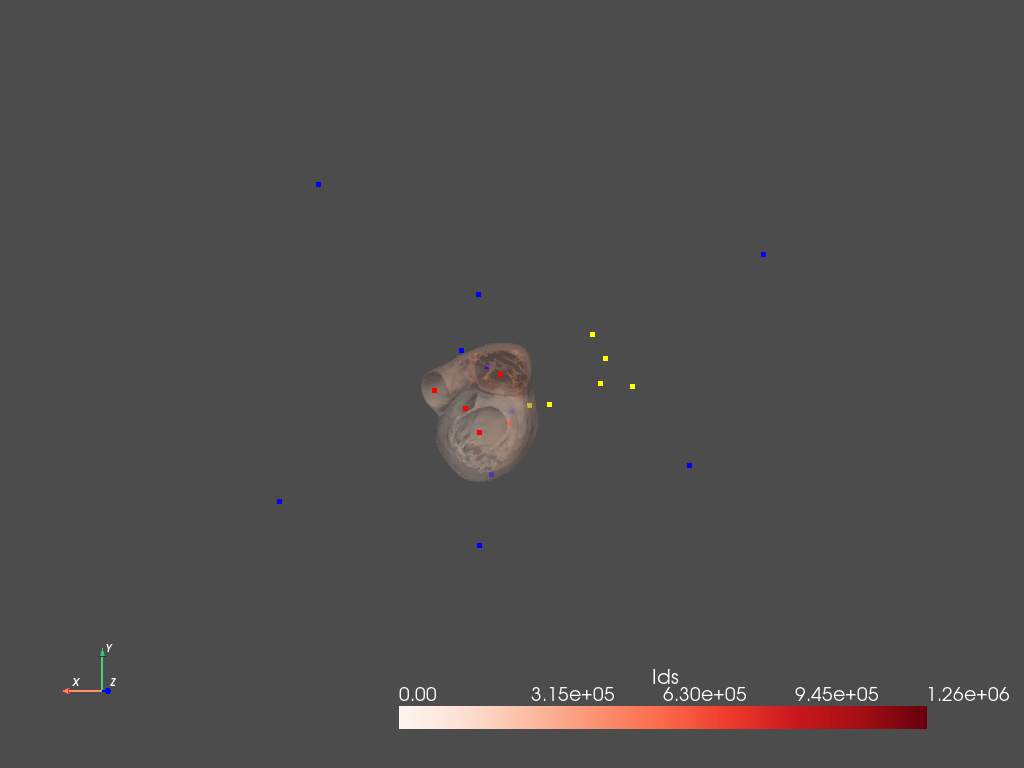

In [23]:
import numpy as np
import pyvista
import SimpleITK as sitk

# Fixed points
fixed_points = np.array([
    [14.83343254, 138.84328635, 381.69040887], # mitral-valve
    [4.05351488, 118.41811815, 391.29761896], # aortic-valve
    [-23.05345085, 92.81499077, 363.12556701], # tricuspid-valve
    [12.11718736, 95.61561885, 424.1137484], # pulmonary-valve
    [66.62810203, 76.12861982, 352.41549411], # left_ventricle 
    [45.85018296, 77.32545243, 333.88303795] # right_ventricle 
])

# Moving points
moving_points = np.array([
    [81.90321388, 57.90000882, 205.76663367], # mitral-valve 
    [94.35242091, 75.99022315, 213.31654731], # aortic-valve
    [67.14045655, 102.49380179, 216.20654707], # tricuspid-valve
    [121.58912558, 89.76497459, 223.29557159], # pulmonary-valve
    [67.23725112873248, 84.63169515538843, 296.5102709741695], # left_ventricle 
    [74.54353173118157, 63.020954005473115, 302.25073384261583] # right_ventricle 
])

# Electrode positions
electrode_positions = np.array([
    [91.69106809237354, 167.4055272828183, 251.0416838617331],  # V1
    [114.07772933063883, 123.13918227704727, 291.5674747053013],  # V2
    [97.01364431022192, 109.7927312489943, 317.44575378942824],  # V3
    [81.88880486815538, 71.3859176743268, 349.4243690358569],  # V4
    [98.99550734014053, 15.879947224122954, 348.26233938958114],  # V5
    [106.23537044908527, -44.085603837273695, 329.16199248487465],  # V6
    [170.75567690191764, 234.51300755277248, 77.85629801985534],  # RA
    [262.9539413249434, -2.9189733795951724, 261.5745131716608],  # LA
    [-134.9640236606803, 197.05542132895272, 257.6409644703581],  # RL
    [-70.4506948627224, 22.20437217827933, 400.2792599184596]  # LL
])

moving_model = heart
fixed_model = model
# Create PyVista plotter for the moving heart model
plotter = pyvista.Plotter()
plotter.add_mesh(moving_model, cmap="Reds", opacity=0.3)
plotter.add_mesh(fixed_points, color="yellow", point_size=5)
plotter.add_mesh(moving_points, color="red", point_size=5)
plotter.add_mesh(electrode_positions, color="blue", point_size=5)
plotter.camera_position = 'xy'
plotter.camera.azimuth = 190.0
plotter.show_axes()
plotter.show()

TranslationTransform（平移变换）:
详情： 表示2D或3D的平移变换。

VersorTransform（四元数旋转变换）:
详情： 表示使用四元数（单位四元数）的3D旋转变换。

VersorRigid3DTransform（四元数刚体变换）:
详情： 表示包含由四元数表示的旋转和平移的3D刚体变换。

Euler2DTransform（2D欧拉角变换）:
详情： 表示由欧拉角表示的2D刚体变换。

Euler3DTransform（3D欧拉角变换）:
详情： 表示由欧拉角表示的3D刚体变换。

Similarity2DTransform（2D相似性变换）:
详情： 表示相似性变换的2D版本，这是等比例缩放和由欧拉角表示的刚体变换的组合。

Similarity3DTransform（3D相似性变换）:
详情： 表示相似性变换的3D版本，这是等比例缩放和由四元数表示的刚体变换的组合。

ScaleTransform（尺度变换）:
详情： 表示2D或3D的各向异性缩放变换。

ScaleVersor3DTransform（四元数尺度变换）:
详情： 表示包含刚体变换和各向异性尺度的3D变换（组合不如预期）。

ScaleSkewVersor3DTransform（四元数尺度和偏斜变换）:
详情： 表示包含刚体变换、各向异性尺度和偏斜矩阵的3D变换（组合不如预期）。

ComposeScaleSkewVersor3DTransform（组合变换）:
详情： 表示包含旋转（R）、尺度（S）和剪切（K）的3D变换，记为A=RSK，另外还有平移。

AffineTransform（仿射变换）:
详情： 表示包含平移、旋转、缩放和剪切的2D或3D仿射变换。

BSplineTransform（B样条变换）:
详情： 表示使用稀疏正则网格控制点的2D或3D可变形变换。

DisplacementFieldTransform（位移场变换）:
详情： 表示使用密集正则网格矢量的2D或3D可变形变换。

CompositeTransform（复合变换）:
详情： 表示通过组合连接的一系列变换，最后添加的变换最先应用。

Transform（变换）:
详情： SimpleITK中所有变换的父/超类，包括2D和3D。

这些类都与图形和图像处理、几何变换等领域有关，以下是它们的简要解释：

vtkLinearTransform:

vtkLinearTransform 是 VTK（Visualization Toolkit）库中的一个类，用于表示线性变换，例如旋转、缩放和平移。这个类是一个抽象基类，不能直接实例化，而是通过派生类来实现特定的线性变换。
vtkIdentityTransform:

vtkIdentityTransform 是 vtkLinearTransform 的一个具体实现，表示没有任何变换的恒等变换，即一个对象与其自身完全相同。
vtkIterativeClosestPoint:

vtkIterativeClosestPoint 是 VTK 中的一个类，用于执行迭代最近点算法（Iterative Closest Point, ICP）。ICP 是一种用于配准（对齐）两组点云的算法，通常在三维重建、计算机视觉和机器人领域中使用。
Transform:

Transform 是一个通用的术语，可以表示任何一种空间变换。在计算机图形学和图像处理中，Transform 通常用于描述坐标系之间的变换，包括旋转、平移和缩放等。
vtkLandmarkTransform:

vtkLandmarkTransform 是 VTK 中的一个类，用于基于地标点的变换。它通过匹配两组地标点来计算最佳的变换矩阵，从而实现空间变换。
vtkMatrixToLinearTransform:

vtkMatrixToLinearTransform 是 VTK 中的一个类，用于将矩阵转换为线性变换。它允许将给定的矩阵作为变换的表示，用于执行各种线性变换操作。
vtkTransform:

vtkTransform 是 VTK 中的一个类，用于表示通用的仿射变换。它可以包括平移、旋转、缩放等变换，并提供了一种方便的方式来应用这些变换。vtkTransform 可以用于对 VTK 中的对象执行几何变换。
这些类的使用场景和功能因库的版本和具体需求而有所不同，详细了解每个类的文档和示例是使用它们的最佳方式。

In [24]:
import numpy as np
from vtk import vtkPoints

def vtkpoints_to_numpy(vtk_points):
    """Convert VTK vtkPoints to NumPy array."""
    num_points = vtk_points.GetNumberOfPoints()
    points_array = np.empty((num_points, 3))

    for i in range(num_points):
        point = vtk_points.GetPoint(i)
        points_array[i] = point

    return points_array

# # ... (之前的代码保持不变)

# # 将变换后的vtkPoints对象转换为NumPy数组
# transformed_points_np = vtkpoints_to_numpy(transformed_vtk_points)

# # 创建一个新的PyVista点云对象
# transformed_move_cloud = pv.PolyData(transformed_points_np)

# # 显示配准后的模型
# p2 = pv.Plotter()
# p2.add_mesh(fix_cloud, color="red", point_size=10, render_points_as_spheres=True)
# p2.add_mesh(transformed_move_cloud, color="green", point_size=10, render_points_as_spheres=True)
# p2.show()


# Landmark transform

Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.


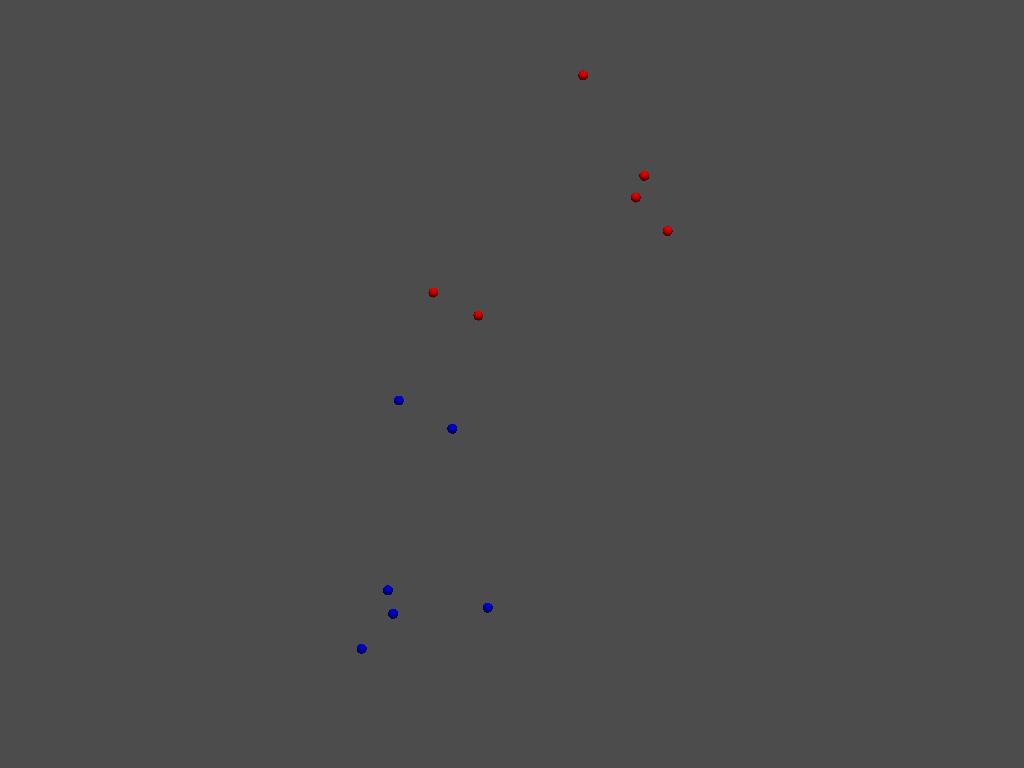

Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.


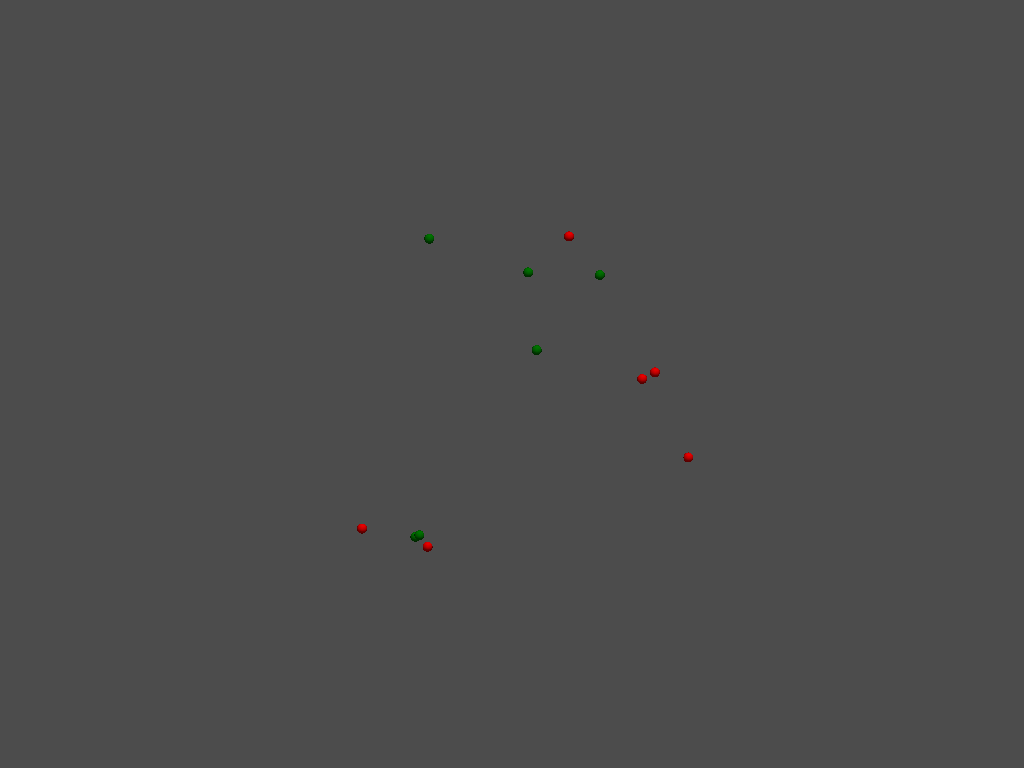

In [25]:
import pyvista as pv
from vtk import vtkLandmarkTransform

# 生成固定和移动模型的点云数据
fix_points = np.array([
    [14.83343254, 138.84328635, 381.69040887],
    [4.05351488, 118.41811815, 391.29761896],
    [-23.05345085, 92.81499077, 363.12556701],
    [12.11718736, 95.61561885, 424.1137484],
    [66.62810203, 76.12861982, 352.41549411],
    [45.85018296, 77.32545243, 333.88303795],
])

move_points = np.array([
    [81.90321388, 57.90000882, 205.76663367],
    [94.35242091, 75.99022315, 213.31654731],
    [67.14045655, 102.49380179, 216.20654707],
    [121.58912558, 89.76497459, 223.29557159],
    [67.23725112873248, 84.63169515538843, 296.5102709741695],
    [74.54353173118157, 63.020954005473115, 302.25073384261583],
])

fix_cloud = pv.PolyData(fix_points)
move_cloud = pv.PolyData(move_points)

p = pv.Plotter()
p.add_mesh(fix_cloud, color="red", point_size=10, render_points_as_spheres=True)
p.add_mesh(move_cloud, color="blue", point_size=10, render_points_as_spheres=True)
p.show()

fix_vtk_points = vtkPoints()
for point in fix_points:
    fix_vtk_points.InsertNextPoint(point)

move_vtk_points = vtkPoints()
for point in move_points:
    move_vtk_points.InsertNextPoint(point)

landmark_transform = vtkLandmarkTransform()
landmark_transform.SetSourceLandmarks(fix_vtk_points)
landmark_transform.SetTargetLandmarks(move_vtk_points)
landmark_transform.SetModeToRigidBody()
landmark_transform.Update()

transformed_vtk_points = vtkPoints()
landmark_transform.TransformPoints(move_vtk_points, transformed_vtk_points)

transformed_points_np = vtkpoints_to_numpy(transformed_vtk_points)

transformed_move_cloud = pv.PolyData(transformed_points_np)

p2 = pv.Plotter()
p2.add_mesh(fix_cloud, color="red", point_size=10, render_points_as_spheres=True)
p2.add_mesh(transformed_move_cloud, color="green", point_size=10, render_points_as_spheres=True)
p2.show()


Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.


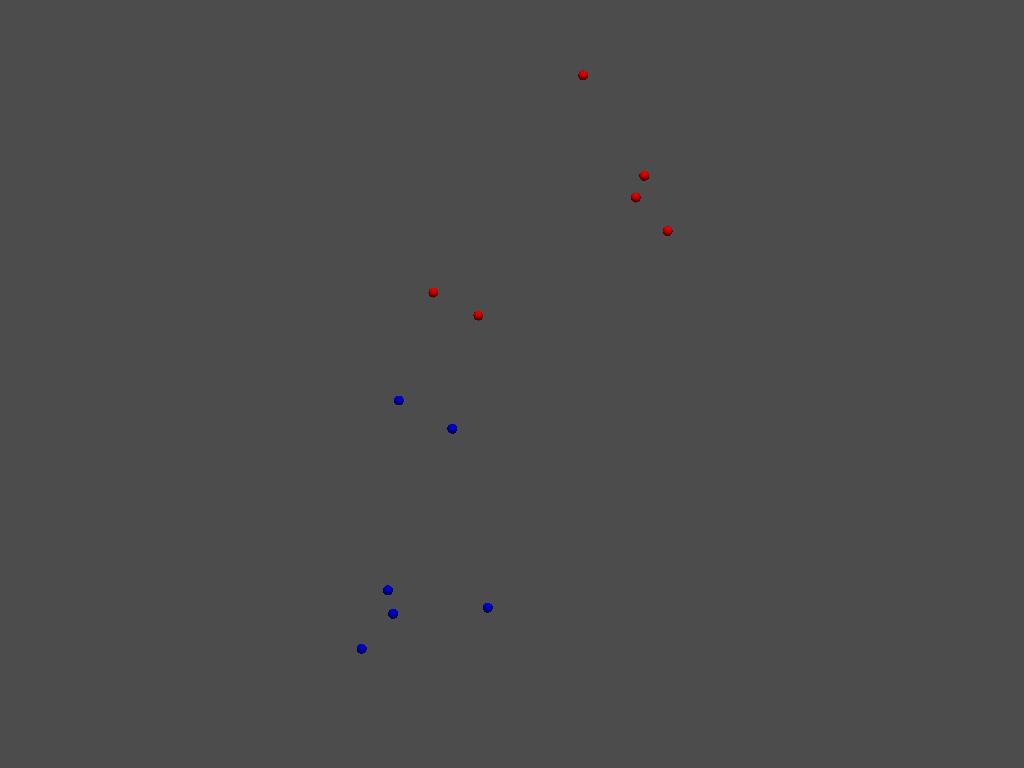

Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.


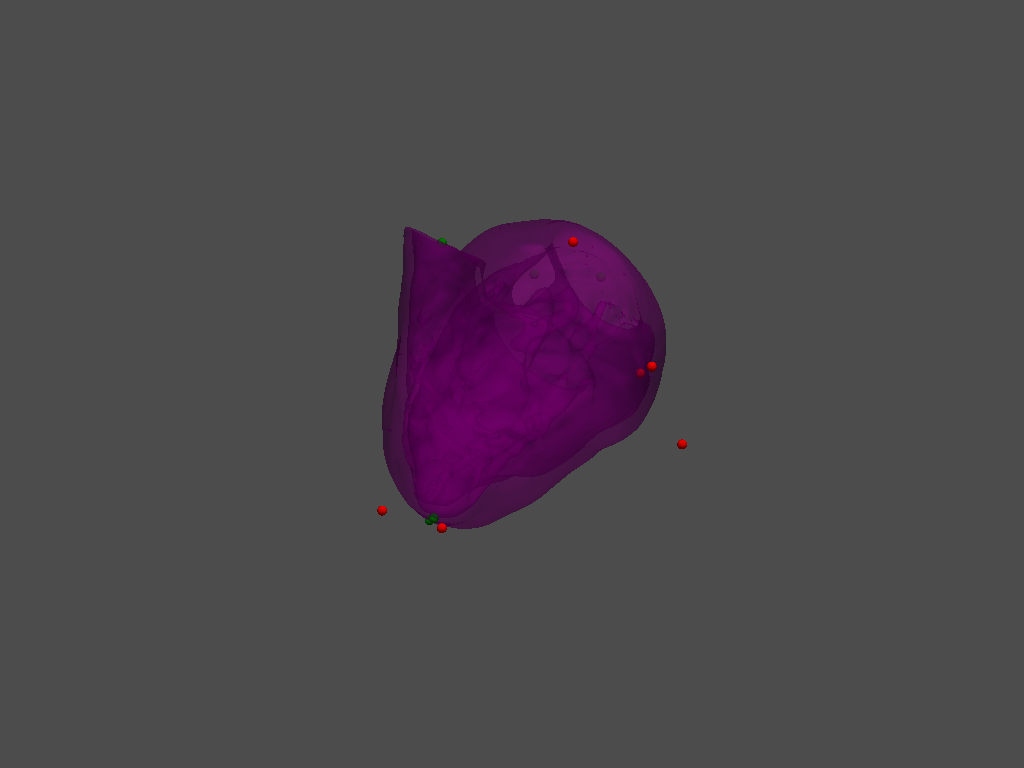

In [26]:
import numpy as np
import pyvista as pv
from vtk import vtkLandmarkTransform, vtkPoints, vtkTransform

fix_cloud = pv.PolyData(fix_points)
move_cloud = pv.PolyData(move_points)

p = pv.Plotter()
p.add_mesh(fix_cloud, color="red", point_size=10, render_points_as_spheres=True)
p.add_mesh(move_cloud, color="blue", point_size=10, render_points_as_spheres=True)
p.show()

fix_vtk_points = vtkPoints()
for point in fix_points:
    fix_vtk_points.InsertNextPoint(point)

move_vtk_points = vtkPoints()
for point in move_points:
    move_vtk_points.InsertNextPoint(point)


"""
establish the mapping relationship between the two spaces

vtkLandmarkTransform facilitates mapping points 
between spaces based on 
user-defined landmark correspondences
"""
landmark_transform = vtkLandmarkTransform()
landmark_transform.SetSourceLandmarks(fix_vtk_points)
landmark_transform.SetTargetLandmarks(move_vtk_points)
landmark_transform.SetModeToRigidBody()
landmark_transform.Update()

matrix = landmark_transform.GetMatrix()

vtk_transform = vtkTransform()
vtk_transform.SetMatrix(matrix)

transformed_move_cloud = move_cloud.copy()
transformed_move_cloud.transform(vtk_transform)


moving_model = heart

moving_model.transform(vtk_transform)

p2 = pv.Plotter()
p2.add_mesh(fix_cloud, color="red", point_size=10, render_points_as_spheres=True)
p2.add_mesh(transformed_move_cloud, color="green", point_size=10, render_points_as_spheres=True)
p2.add_mesh(moving_model, color="purple", opacity=0.5)
p2.show()


Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.


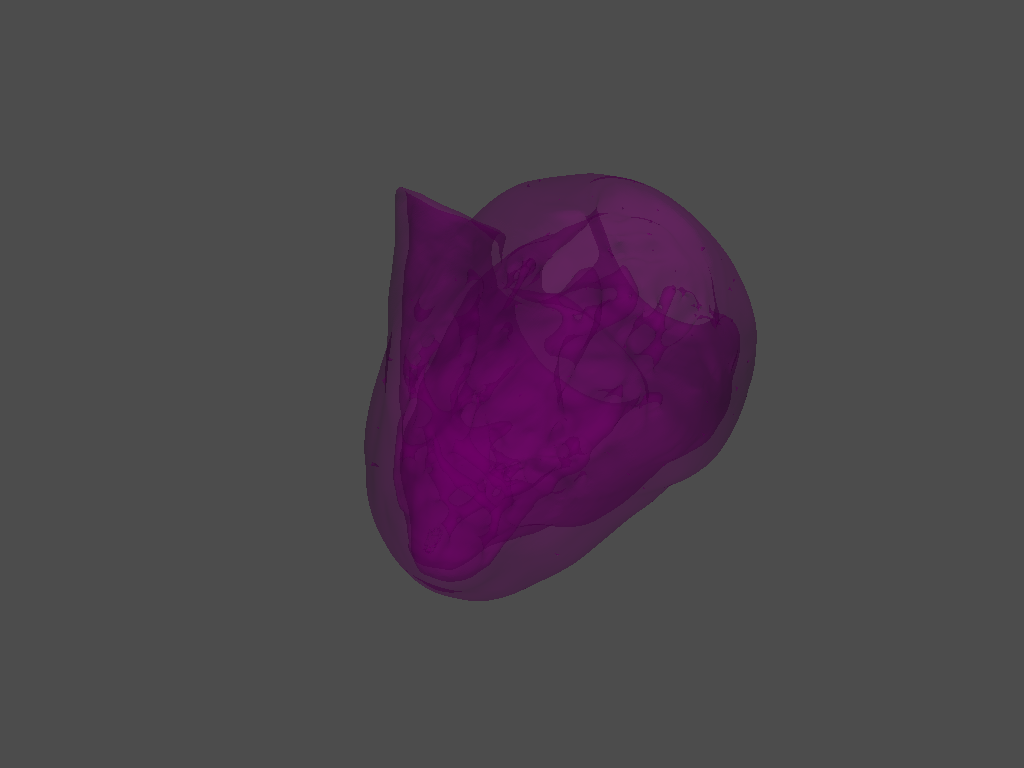

In [49]:
# icp_transform.GetMatrix()


# matrix = icp_transform.GetMatrix()

# icp_transform.SetMatrix(matrix)

# transformed_move_cloud = move_cloud.copy()
# transformed_move_cloud.transform(icp_transform)

p2 = pv.Plotter()
# p2.add_mesh(fix_cloud, color="red", point_size=10, render_points_as_spheres=True)
# p2.add_mesh(transformed_move_cloud, color="green", point_size=10, render_points_as_spheres=True)

aligned = heart.transform(icp_transform.GetMatrix())
# moving_model.transform(icp_transform)
p2.add_mesh(aligned, color="purple", opacity=0.3)

# p2.background_color = "white"
# p2.camera_position = 'xy'
# p2.camera.azimuth = 180.0




p2.show()


# rigid transform

Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.


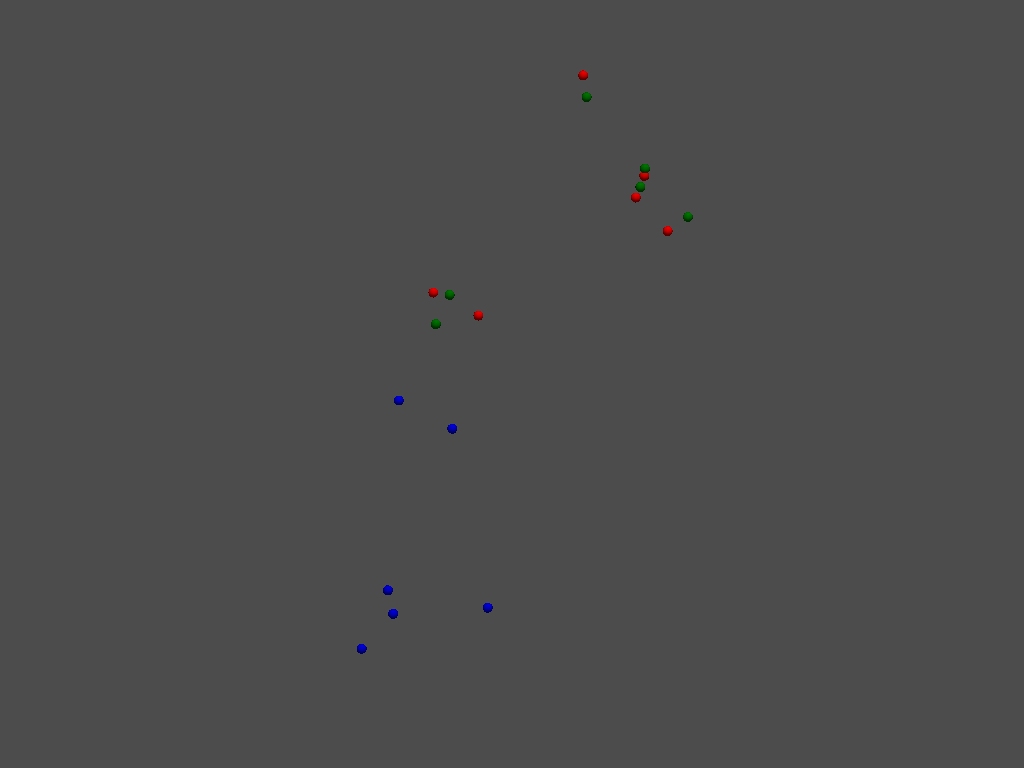

In [33]:
import numpy as np
import pyvista as pv
from scipy.optimize import minimize
from scipy.spatial.transform import Rotation  # Add this line

fix_points = np.array([
    [14.83343254, 138.84328635, 381.69040887],
    [4.05351488, 118.41811815, 391.29761896],
    [-23.05345085, 92.81499077, 363.12556701],
    [12.11718736, 95.61561885, 424.1137484],
    [66.62810203, 76.12861982, 352.41549411],
    [45.85018296, 77.32545243, 333.88303795],
])

move_points = np.array([
    [81.90321388, 57.90000882, 205.76663367],
    [94.35242091, 75.99022315, 213.31654731],
    [67.14045655, 102.49380179, 216.20654707],
    [121.58912558, 89.76497459, 223.29557159],
    [67.23725112873248, 84.63169515538843, 296.5102709741695],
    [74.54353173118157, 63.020954005473115, 302.25073384261583],
])

def rigid_transform(params, points):
    translation = params[:3]
    quaternion = params[3:]
    
    # Ensure quaternion is a unit quaternion
    quaternion /= np.linalg.norm(quaternion)
    
    rotation_matrix = Rotation.from_quat(quaternion).as_matrix()
    
    transformed_points = np.dot(points - translation, rotation_matrix.T)
    
    return transformed_points

def objective_function(params, fixed_points, moving_points):
    transformed_points = rigid_transform(params, moving_points)
    distance = np.sum(np.square(transformed_points - fixed_points))
    return distance

random_quaternion = Rotation.random().as_quat()
initial_params = np.zeros(7)
initial_params[:3] = np.random.rand(3)  # Random translation
initial_params[3:] = random_quaternion

# Constrain quaternion components to ensure they remain valid
constraints = ({'type': 'eq', 'fun': lambda params: 1.0 - np.sum(params[3:] ** 2)})

result = minimize(objective_function, initial_params, args=(fix_points, move_points), method='L-BFGS-B', constraints=constraints)

optimal_params = result.x

transformed_move_points = rigid_transform(optimal_params, move_points)

fix_cloud = pv.PolyData(fix_points)
move_cloud = pv.PolyData(move_points)
transformed_move_cloud = pv.PolyData(transformed_move_points)

p = pv.Plotter()
p.add_mesh(fix_cloud, color="red", point_size=10, render_points_as_spheres=True)
p.add_mesh(move_cloud, color="blue", point_size=10, render_points_as_spheres=True)
p.add_mesh(transformed_move_cloud, color="green", point_size=10, render_points_as_spheres=True)


moving_model = heart
# Apply the transformation to the moving_model
translation = optimal_params[:3]
rotation_quaternion = optimal_params[3:]
rotation_matrix = Rotation.from_quat(rotation_quaternion).as_matrix()
transformed_points = np.dot(moving_model.points - translation, rotation_matrix.T)
moving_model_transformed = pv.PolyData(transformed_points)
# Add the transformed moving point cloud
p2.add_mesh(moving_model_transformed, color="green", point_size=10, render_points_as_spheres=True)


p.show()


Method L-BFGS-B cannot handle constraints.
Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.


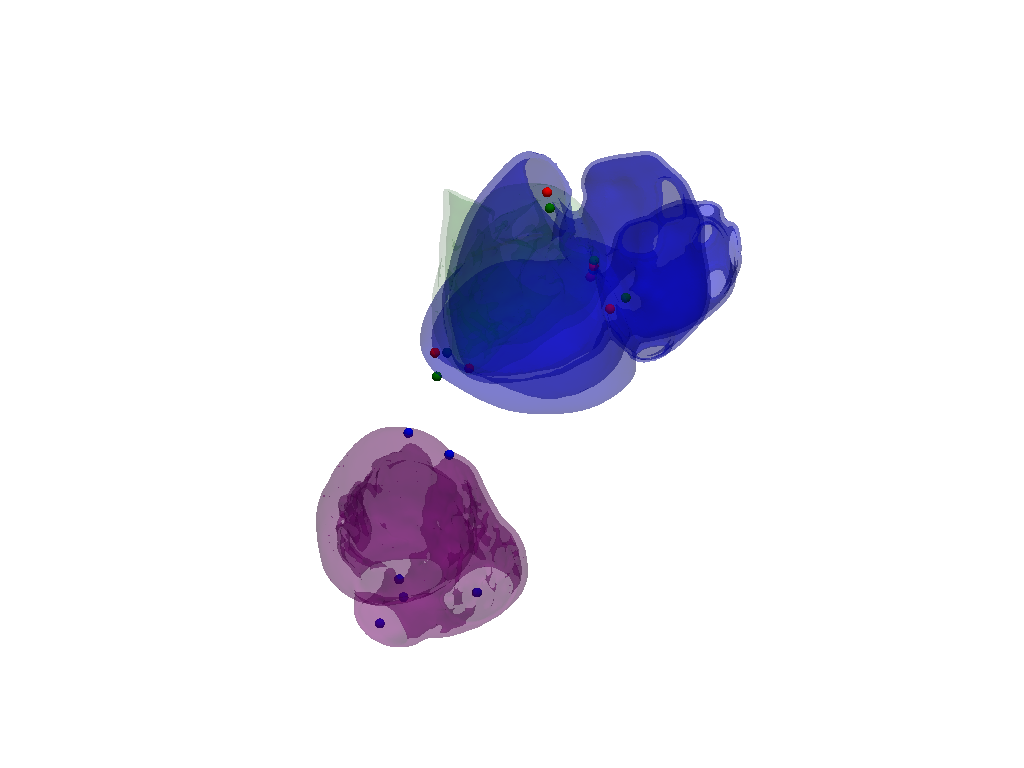

In [42]:
import numpy as np
import pyvista as pv
from scipy.optimize import minimize
from scipy.spatial.transform import Rotation

fix_points = np.array([
    [14.83343254, 138.84328635, 381.69040887],
    [4.05351488, 118.41811815, 391.29761896],
    [-23.05345085, 92.81499077, 363.12556701],
    [12.11718736, 95.61561885, 424.1137484],
    [66.62810203, 76.12861982, 352.41549411],
    [45.85018296, 77.32545243, 333.88303795],
])

move_points = np.array([
    [81.90321388, 57.90000882, 205.76663367],
    [94.35242091, 75.99022315, 213.31654731],
    [67.14045655, 102.49380179, 216.20654707],
    [121.58912558, 89.76497459, 223.29557159],
    [67.23725112873248, 84.63169515538843, 296.5102709741695],
    [74.54353173118157, 63.020954005473115, 302.25073384261583],
])

moving_model = heart

# Define the initial transformation parameters
random_quaternion = Rotation.random().as_quat()
initial_params = np.zeros(7)
initial_params[:3] = np.random.rand(3)  # Random translation
initial_params[3:] = random_quaternion


# Define the rigid transform function
def rigid_transform(params, points):
    translation = params[:3]
    quaternion = params[3:]
    quaternion /= np.linalg.norm(quaternion)
    rotation_matrix = Rotation.from_quat(quaternion).as_matrix()
    transformed_points = np.dot(points - translation, rotation_matrix.T)
    return transformed_points

# Define the objective function
def objective_function(params, fixed_points, moving_points):
    transformed_points = rigid_transform(params, moving_points)
    distance = np.sum(np.square(transformed_points - fixed_points))
    return distance

# Constrain quaternion components to ensure they remain valid
constraints = ({'type': 'eq', 'fun': lambda params: 1.0 - np.sum(params[3:] ** 2)})

# minimization
result = minimize(objective_function, initial_params, args=(fix_points, move_points), method='L-BFGS-B', constraints=constraints)

# get optimal parameters
optimal_params = result.x

transformed_move_points = rigid_transform(optimal_params, move_points)

# Visualization
p2 = pv.Plotter()

fix_cloud = pv.PolyData(fix_points)
move_cloud = pv.PolyData(move_points)
transformed_move_cloud = pv.PolyData(transformed_move_points)

p2 = pv.Plotter()
p2.add_mesh(fix_cloud, color="red", point_size=10, render_points_as_spheres=True)
p2.add_mesh(move_cloud, color="blue", point_size=10, render_points_as_spheres=True)
p2.add_mesh(transformed_move_cloud, color="green", point_size=10, render_points_as_spheres=True)

# Get the optimized parameters
optimal_params = result.x

# Apply the optimal transformation to the moving model
transformed_model = moving_model.copy()
transformed_model.points = rigid_transform(optimal_params, moving_model.points)

# Visualize the original moving model and the transformed model
p2.add_mesh(moving_model, color="green", opacity=0.1)
p2.add_mesh(transformed_model, color="purple", opacity=0.3)
p2.add_mesh(model.mesh, color="blue", opacity=0.3)


# Set the background color and show the plotter
p2.background_color = "white"
p2.show()


In [43]:
optimal_params

array([-2.58368315e+02,  1.24605415e+02,  4.18819399e+02,  7.95527862e-01,
       -2.13507456e-01,  5.22990043e-01,  2.19160676e-01])

## Then apply ICP (afrer rigid registration）--> dosent help